hit.SetHPFCoef(0.9996439371675712, -0.9996439371675712, -0.9992878743351423);
hit.SetLPFCoef(0.007073522215301396, 0.007073522215301396, -0.9858529555693972);


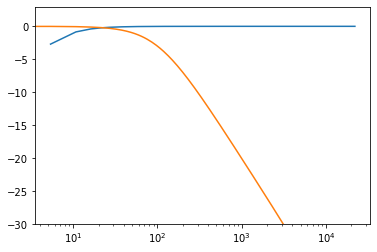

In [16]:
import numpy as np
from scipy.signal import butter, freqz
from matplotlib import pyplot as plt 

sample_rate = 44100.
hpf_cutoff = 5.
lpf_cutoff = 100.

worN = 4096
f = np.linspace(0, sample_rate/2, worN)

b, a = butter(1, hpf_cutoff / sample_rate * 2, btype="high")
w, h = freqz(b, a, worN=worN)
b2, a2 = butter(1, lpf_cutoff / sample_rate * 2, btype="low")
w, h2 = freqz(b2, a2, worN=worN)

_ = plt.semilogx(f, 20*np.log10(np.abs(h)), f, 20*np.log10(np.abs(h2)))
_ = plt.ylim([-30, +3])

print("hit.SetHPFCoef(%s);" % (", ".join(str(n) for n in (b[0], b[1], a[1]))))
print("hit.SetLPFCoef(%s);" % (", ".join(str(n) for n in (b2[0], b2[1], a2[1]))))